In [61]:
%load_ext autoreload
%autoreload 2

import requests
import numpy as np

from rich import print as pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from quantumion.analog.operator import PauliX, PauliY, PauliZ
from quantumion.analog.circuit import AnalogCircuit
from quantumion.analog.gate import AnalogGate
from backends.analog.qutip import QutipBackend
from backends.task import Task, TaskArgsAnalog

from backends.provider import Provider

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
ex = AnalogCircuit()
gate = AnalogGate(
    duration=1.0,
    unitary=[np.pi * PauliX],
    dissipation=[]
)
ex.add(gate=gate)
pprint(ex)


AnalogCircuit(
    definitions=[],
    registers=[],
    sequence=[
        AnalogGate(
            duration=1.0,
            unitary=[Operator(coefficient=3.141592653589793, qreg=['x'], qmode=[])],
            dissipation=[]
        )
    ],
    n_qreg=1,
    n_qmode=0
)

In [63]:
json_str = ex.model_dump()
pprint(json_str)

ex_parse = AnalogCircuit(**json_str)

{
    'definitions': [],
    'registers': [],
    'sequence': [
        {
            'duration': 1.0,
            'unitary': [{'coefficient': 3.141592653589793, 'qreg': ['x'], 'qmode': []}],
            'dissipation': []
        }
    ],
    'n_qreg': 1,
    'n_qmode': 0
}

In [64]:
args = TaskArgsAnalog(
    n_shots=100,
    fock_trunc=4,
    observables={'z': PauliZ, 'x': PauliX, 'y': PauliY},
    dt=0.1
)

task = Task(program=ex, args=args)

In [65]:
backend = QutipBackend()
result = backend.run(task)
pprint(result)

TaskResultAnalog(
    counts={0: 100},
    expect={
        'z': [
            1.0,
            0.7660445061151082,
            0.17364826087408758,
            -0.49999973410089105,
            -0.9396924597197063,
            -0.9396928406822036,
            -0.5000006872786213,
            0.17364723988018277,
            0.7660436865277727,
            0.999999999998959
        ],
        'x': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'y': [
            0.0,
            -0.6427875346106671,
            -0.9848077383405377,
            -0.8660255573013061,
            -0.3420205858510977,
            0.3420195391649581,
            0.8660250069835782,
            0.9848079183688532,
            0.6427885113557491,
            1.4429211235284641e-06
        ]
    },
    times=[
        0.0,
        0.1111111111111111,
        0.2222222222222222,
        0.3333333333333333,
        0.4444444444444444,
        0.5555555555555556,
        0.6666666666666666,
        0.7777777777777777,
        0.8888888888888888,
        1.0
    ],
    state=array([-1.+0.00000000e+00j,  0.-7.21460562e-07j])
)

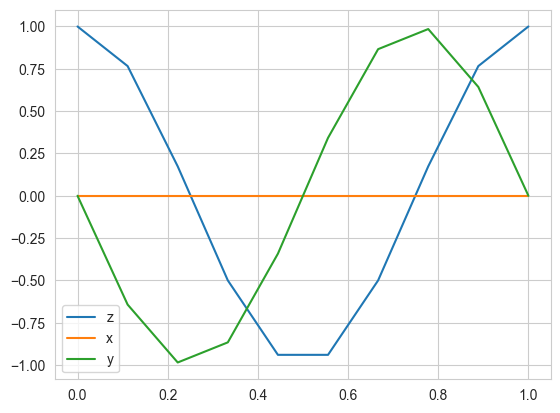

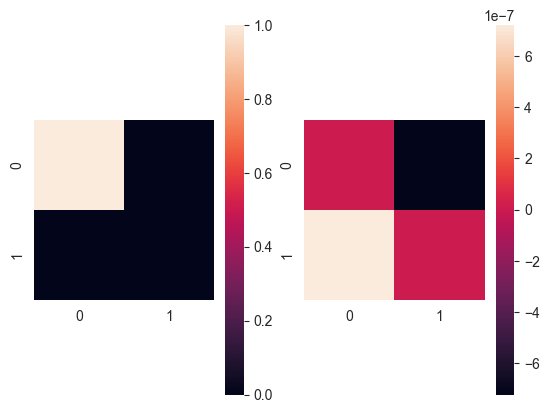

In [66]:
fig, ax = plt.subplots()
for name, expect in result.expect.items():
    ax.plot(result.times, expect, label=name)
ax.legend()
plt.show()

rho = np.outer(result.state, np.conj(result.state))
fig, axs = plt.subplots(1, 2)
sns.heatmap(rho.real, ax=axs[0])
sns.heatmap(rho.imag, ax=axs[1])
for ax in axs:
    ax.set_aspect('equal')
plt.show()

In [67]:
provider = Provider()
job = provider.submit(task)
print(job)

{'id': 'bc0bbabe-5941-498a-ad78-194574051dc6', 'status': 'queued'}


In [70]:
print(job)
results = provider.get_result(job)
pprint(results)

{'id': 'bc0bbabe-5941-498a-ad78-194574051dc6', 'status': 'queued'}


{
    'counts': {'0': 100},
    'expect': {
        'z': [
            1.0,
            0.7660445061151082,
            0.17364826087408758,
            -0.49999973410089105,
            -0.9396924597197063,
            -0.9396928406822036,
            -0.5000006872786213,
            0.17364723988018277,
            0.7660436865277727,
            0.999999999998959
        ],
        'x': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        'y': [
            0.0,
            -0.6427875346106671,
            -0.9848077383405377,
            -0.8660255573013061,
            -0.3420205858510977,
            0.3420195391649581,
            0.8660250069835782,
            0.9848079183688532,
            0.6427885113557491,
            1.4429211235284641e-06
        ]
    },
    'times': [
        0.0,
        0.1111111111111111,
        0.2222222222222222,
        0.3333333333333333,
        0.4444444444444444,
        0.5555555555555556,
        0.6666666666666666,
        0.7777777777777777,
        0.8888888888888888,
        1.0
    ],
    'state': '[-1.+0.00000000e+00j  0.-7.21460562e-07j]'
}

In [71]:
from backends.task import Task, TaskArgsDigital
from backends.digital.data import TaskResultDigital
from backends.digital.tc import TensorCircuitBackend

from quantumion.digital.circuit import DigitalCircuit
from quantumion.digital.gate import Gate, H, CNOT
from quantumion.digital.statement import Statement, Measure, Barrier
from quantumion.digital.register import QuantumRegister, ClassicalRegister

qreg = QuantumRegister(id='q', reg=2)
creg = ClassicalRegister(id='c', reg=2)

circ = DigitalCircuit(qreg=qreg, creg=creg)
circ.add(H(qreg=qreg[0]))
circ.add(CNOT(qreg=qreg[0:2]))
pprint(circ)

DigitalCircuit(
    qreg=[QuantumRegister(id='q', reg=[QuantumBit(id='q', index=0), QuantumBit(id='q', index=1)])],
    creg=[ClassicalRegister(id='c', reg=[ClassicalBit(id='c', index=0), ClassicalBit(id='c', index=1)])],
    declarations=[],
    sequence=[
        H(name='h', qreg=QuantumBit(id='q', index=0), creg=None, params=None),
        CNOT(
            name='cx',
            qreg=QuantumRegister(id='q', reg=[QuantumBit(id='q', index=0), QuantumBit(id='q', index=1)]),
            creg=None,
            params=None
        )
    ]
)

In [ ]:
args = TaskArgsDigital(n_shots=100)
task = Task(program=circ, args=args)

backend = TensorCircuitBackend()
result = backend.run(task)
pprint(result)

In [ ]:
fig, ax = plt.subplots()
x = list(result.counts.keys())
ax.bar(x=x, height=list(result.counts.values()))
ax.set(xticks=x)
fig.show()

rho = np.outer(result.state, np.conj(result.state))
fig, axs = plt.subplots(1, 2)
sns.heatmap(rho.real, ax=axs[0])
sns.heatmap(rho.imag, ax=axs[1])
for ax in axs:
    ax.set_aspect('equal')
fig.show()